In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pip install sqlalchemy
#pip install mysql-connector-python
from skimage import data
from skimage import io

In [96]:
movies = pd.read_csv('IMDB-Movie-Data.csv')

In [97]:
movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [98]:
movies.isnull().sum() # Finding the number of Null values in the dataset

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [99]:
movies = movies_no_duplicates = movies.drop_duplicates() # Dropping the duplicates

In [100]:
movies_renamed = movies.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)' : 'Revenue_millions', 'Rating' : 'IMDb_rating'})
movies_renamed
movies = movies_renamed
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [101]:
movies_dropna = movies.dropna(how='any', subset = 'Revenue_millions') # Dropping null values of column 'Revenue'
movies_dropna
movies = movies_dropna
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [102]:
movies_nona = movies.dropna(how='any', subset = 'Metascore') # Dropping null values of column 'Metascore' 
movies_nona
movies = movies_nona
movies # Cleaned: removed duplicates, null values

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [103]:
## Adding new columns to expand the dataset in order implement new observations

In [104]:
movies['Description_len'] = movies['Description'].map(len) # Adding new column using map function to identify the length of each description (will use it to identify does the description length
# have influence on the rating)
movies.head(2)

/var/folders/d0/hq4rwgj90r72xzxl8829mkn00000gn/T/ipykernel_39095/2476405385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Description_len'] = movies['Description'].map(len) # Adding new column using map function to identify the length of each description (will use it to identify does the description length


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,127
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,127


In [105]:
def word_count(txt):
    return len(txt.split())

In [106]:
movies['Description_words'] = movies['Description'].map(word_count)
movies.head(2)

/var/folders/d0/hq4rwgj90r72xzxl8829mkn00000gn/T/ipykernel_39095/1726154656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Description_words'] = movies['Description'].map(word_count)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,127,21
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,127,24


In [107]:
movies['IMDb_rating_Metascore'] = movies['IMDb_rating'] + movies['Metascore']
movies['IMDb_rating_Metascore'].sort_values(ascending=False).max()
tmp_movies = movies.set_index('IMDb_rating_Metascore')
movies_imdb_metascore = tmp_movies.sort_values(by='IMDb_rating_Metascore', ascending=False) 
movies_imdb_metascore.iloc[0] # combining both IMDb rating and Metascore, movie 'Boyhood' appears to be in the first position. However, Metascore rating doesn't provide additional information
# on how many votes there were in total. Hence, this combined rating isn't that much trusted. HYPOTHESIS - DENIED

/var/folders/d0/hq4rwgj90r72xzxl8829mkn00000gn/T/ipykernel_39095/3861888518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['IMDb_rating_Metascore'] = movies['IMDb_rating'] + movies['Metascore']


Rank                                                               657
Title                                                          Boyhood
Genre                                                            Drama
Description          The life of Mason, from early childhood to his...
Director                                             Richard Linklater
Actors               Ellar Coltrane, Patricia Arquette, Ethan Hawke...
Year                                                              2014
Runtime                                                            165
IMDb_rating                                                        7.9
Votes                                                           286722
Revenue_millions                                                 25.36
Metascore                                                        100.0
Description_len                                                     66
Description_words                                                   12
Name: 

In [108]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   838 non-null    int64  
 1   Title                  838 non-null    object 
 2   Genre                  838 non-null    object 
 3   Description            838 non-null    object 
 4   Director               838 non-null    object 
 5   Actors                 838 non-null    object 
 6   Year                   838 non-null    int64  
 7   Runtime                838 non-null    int64  
 8   IMDb_rating            838 non-null    float64
 9   Votes                  838 non-null    int64  
 10  Revenue_millions       838 non-null    float64
 11  Metascore              838 non-null    float64
 12  Description_len        838 non-null    int64  
 13  Description_words      838 non-null    int64  
 14  IMDb_rating_Metascore  838 non-null    float64
dtypes: flo

In [109]:
movies.shape

(838, 15)

In [110]:
movies.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
count,838.000000,838,838,838,838,838,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000,838.000000,838.000000
unique,NaN,837,189,838,524,834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,485.247017,NaN,NaN,NaN,NaN,NaN,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,163.838902,28.056086,66.389499
std,286.572065,NaN,NaN,NaN,NaN,NaN,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,49.277277,8.651514,17.554926
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,42.000000,9.000000,16.300000
25%,238.250000,NaN,NaN,NaN,NaN,NaN,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,130.000000,22.000000,53.800000
50%,475.500000,NaN,NaN,NaN,NaN,NaN,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,158.000000,27.000000,66.700000
75%,729.750000,NaN,NaN,NaN,NaN,NaN,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,198.000000,34.000000,79.875000


In [111]:
print(movies['Votes'].max())
print(movies['Votes'].min())

1791916
178


## Most popular genre and its generated revenue

In [112]:
## space for genre/revenue hypothesis

## Does the length of movies (in minutes) have a positive impact on the IMDb ratings?

In [113]:
## Testing to see correlation between IMDb rating and runtime.

# It can be seen that there is some sort of positive correlation between the two variables, although it's not close to being perfect.
# Hypothesis: the longer the movie, the higher IMDb rating is is not entirely true, as the correlation coefficient is 0.37 between the two variables, which
# indicates a WEAK correlation.

In [114]:
movies['Runtime'].max()

187

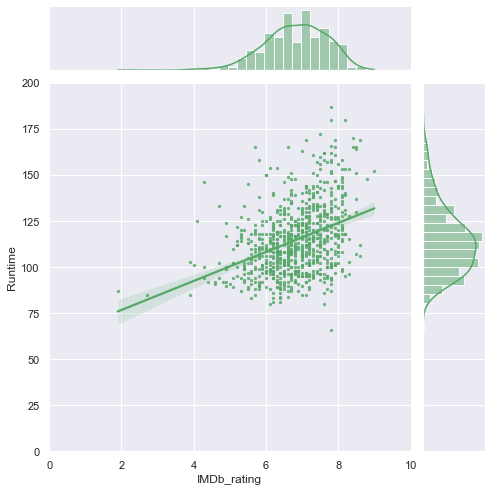

In [115]:
runtime_IMDbrating = sns.jointplot(x="IMDb_rating", y="Runtime", data=movies,
                  kind="reg",
                  xlim=(0, 10), ylim=(0, 200),
                  scatter_kws={"s": 5},
                  color="g", height=7)

In [116]:
movies.corr() # Gives the correlation coefficient between variables. The closer to 1, the more perfect correlation. 

,Rank,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
Rank,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909,0.010977,0.010461,-0.201342
Year,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303,-0.044637,-0.047485,-0.067450
Runtime,-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397,0.089824,0.079078,0.232527
IMDb_rating,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731,0.008558,0.028717,0.699643
Votes,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674,0.033050,0.048366,0.347129
Revenue_millions,-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397,0.041947,0.060236,0.148365
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000,-0.096575,-0.081926,0.999315
Description_len,0.010977,-0.044637,0.089824,0.008558,0.033050,0.041947,-0.096575,1.000000,0.966046,-0.092832
Description_words,0.010461,-0.047485,0.079078,0.028717,0.048366,0.060236,-0.081926,0.966046,1.000000,-0.077678
IMDb_rating_Metascore,-0.201342,-0.067450,0.232527,0.699643,0.347129,0.148365,0.999315,-0.092832,-0.077678,1.000000


#### The hypothesis 'Does the length of movies (in minutes) have a positive impact on the IMDb ratings?' is rejected, as there is a weak correlation between the two variables.
#### Correlation coefficient = 0.37 (weak correlation)

In [117]:
# For example, there is a moderately strong positive correlation (0.67) between Metascore and IMDb_rating (which was expected);
# There is also a moderately strong positive correlation (0.64) between the Revenue and the number of votes,
# as I see it, the number of votes indicate the popularity of a movie, and popular movies tend to generate more revenue.

<AxesSubplot:xlabel='IMDb_rating', ylabel='Metascore'>

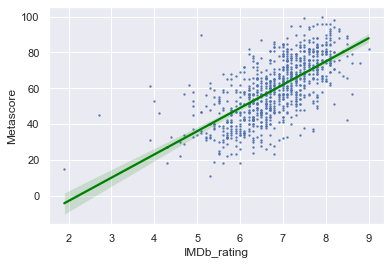

In [133]:
sns.regplot(data=movies, x='IMDb_rating', y='Metascore', scatter_kws={"s": 2}, line_kws={'color': 'green'})

# Positive relationship between two types of ratings.

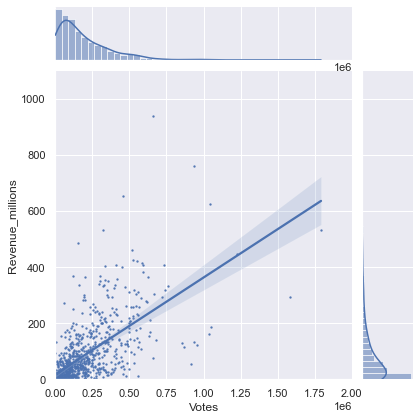

In [161]:
Revenue_Votes = sns.jointplot(x="Votes", y="Revenue_millions", data=movies,
                  kind="reg",
                  xlim=(0, 2000000), ylim=(0, 1100),
                  scatter_kws={"s": 2},
                  color="b", height=6)

## Did the most popular director in each of the following year intervals: 2006 to 2009; 2010 - 2016 (taking into consideration IMDd rating and the count of the votes) generated the most revenue?

In [118]:
# Testing to see if the most popular director in the given time intervals (taking into account IMDb rating and the count of the votes) also generatef the most revenue?

In [120]:
movies['Year'].value_counts() # 2016 was the most popular year for releasing new movies

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

In [121]:
movies[movies['Year'].isin(range(2010,2017)) & (movies['IMDb_rating'] >= 8.5) & (movies['Votes'] >= 900000)]

# 2010-2016 rezisierius Christopher Nolan sukure visus filmus, kuriu IMDb ivertinimas yra >= 8.5, atsizvelgiant i balsavusiu zmoniu skaiciu (parinktas atspirties taskas 900k balsu, kad isvados butu svaresnes)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,99,17,82.6
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,148,26,82.8
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,238,41,86.5


In [122]:
movies[movies['Year'].isin(range(2006,2010)) & (movies['IMDb_rating'] >= 8.5) & (movies['Votes'] >= 900000)]
 #2006 - 2010 metu intervale Christopher Nolan islieka kaip populiariausias rezisierius, kurio sukurti filmai yra >= 8.5 IMDb balo

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,197,36,91.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,108,16,74.5
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,123,22,93.5


In [123]:
# Tarp 6 vienų geriausių dešimtmečio filmų (pradinis kiekis 838), atsižvelgiant į IMDb reitingą ir balsavusių žmonių kiekį, Christopher Nolan yra populiariausias režisierius, užėmęs penkias pozicijas iš
# šešių.

In [124]:
movies[movies['Director'] == 'Christopher Nolan'] # Christopher Nolan per dešimtmetį yra sukūręs 5 filmus, iš kurių visi pateko į geriausių filmų sąrašą (pagal prieš tai aptartas kategorijas.)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,99,17,82.6
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,197,36,91.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,108,16,74.5
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,148,26,82.8
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,238,41,86.5


In [125]:
grouped = movies.groupby(['Director'])['Revenue_millions'].sum().sort_values(ascending=False)
grouped

# Hipotezė, ar populiariausias dešimtmečio režisierius Christopher Nolan (pagal IMDb vertinimą ir balsavusių žmonių skaičių),
# taip pat sugeneravo daugiausiai pajamų, atmesta. Jis užima 3 vietą ir sugeneravo 1515 milijonų dolerių.

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
                      ...   
Gus Van Sant            0.02
Robin Swicord           0.01
So Yong Kim             0.01
Patricia Rozema         0.01
Andy Goddard            0.00
Name: Revenue_millions, Length: 524, dtype: float64

In [126]:
movies[movies['Director'] == 'J.J. Abrams']
# Tuo tarpu režisierius, sugeneravęs daugiausiai pajamų per dešimtmetį, nėra sukūręs filmo, kuris pralenktų Christopher Nolan filmus IMBd reitingo aspektu.
# Tačiau, J.J. Abrams filmai turi mažesnį balsavusių žmonių kiekį, tad lyginimas nėra idealus.

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,207,38,89.1
140,141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,82.0,205,39,90.0
362,363,Star Trek Into Darkness,"Action,Adventure,Sci-Fi",After the crew of the Enterprise find an unsto...,J.J. Abrams,"Chris Pine, Zachary Quinto, Zoe Saldana, Bened...",2013,132,7.8,417663,228.76,72.0,202,34,79.8
497,498,Super 8,"Mystery,Sci-Fi,Thriller","During the summer of 1979, a group of friends ...",J.J. Abrams,"Elle Fanning, AJ Michalka, Kyle Chandler, Joel...",2011,112,7.1,298913,126.98,72.0,134,22,79.1
869,870,Mission: Impossible III,"Action,Adventure,Thriller",Agent Ethan Hunt comes into conflict with a da...,J.J. Abrams,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph...",2006,126,6.9,270429,133.38,66.0,131,23,72.9


In [127]:
print(movies['Director'].value_counts().idxmax()) # Director who appeared the most
movies[movies['Director'] == 'Ridley Scott']

Ridley Scott


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,127,24,72.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0,151,30,88.0
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0,186,32,59.7
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0,176,32,83.8
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0,182,29,58.0
521,522,The Counselor,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0,82,15,53.3
530,531,A Good Year,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0,206,35,53.9
737,738,Body of Lies,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0,177,28,64.1


#### Hypothesis: If the most popular director (according to IMDb ranking and the number of votes) generated the most revenue is rejected.
#### Christopher Nolan ranks 3rd from 524 unique directors.

## Hypothesis - ar populiariausias žanras sugeneravo daugiausiai pajamų per 2006-2010 metus?

In [128]:
movies['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64

In [129]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,127,21,84.1
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,127,24,72.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,157,27,69.3
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,222,37,66.2
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,179,27,46.2


In [130]:
print(movies['Revenue_millions'].mean())
print(movies['Revenue_millions'].min())
print(movies['Revenue_millions'].max())

84.5645584725537
0.0
936.63


In [140]:
# Movie that generated the most revenue and the movie that generated the least revenue comparison

In [131]:
movies[movies['Revenue_millions'] == 0] # Movie with less than 1 million of revenue

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Description_len,Description_words,IMDb_rating_Metascore
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50.0,349,59,55.2


In [132]:
print(movies['Runtime'].mean())
print(movies['IMDb_rating'].mean())
print(movies['Metascore'].mean())
print(movies['Votes'].mean())


114.63842482100239
6.814319809069212
59.575178997613364
193230.25178997614


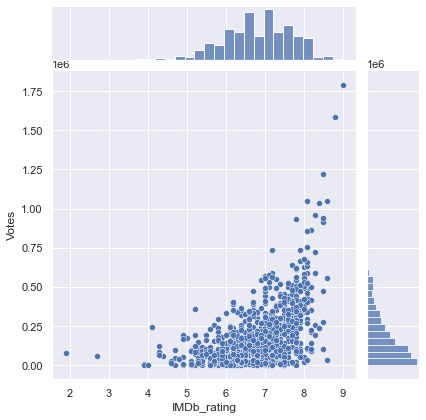

In [134]:
sns.jointplot(data=movies, x='IMDb_rating', y='Votes')

In [135]:
movies['Actors']

0      Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
1      Noomi Rapace, Logan Marshall-Green, Michael Fa...
2      James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
3      Matthew McConaughey,Reese Witherspoon, Seth Ma...
4      Will Smith, Jared Leto, Margot Robbie, Viola D...
                             ...                        
993    Milla Jovovich, Ali Larter, Wentworth Miller,K...
994    Thomas Mann, Oliver Cooper, Jonathan Daniel Br...
996    Lauren German, Heather Matarazzo, Bijou Philli...
997    Robert Hoffman, Briana Evigan, Cassie Ventura,...
999    Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...
Name: Actors, Length: 838, dtype: object

In [136]:
#movies['IMDb_rating'].value_counts()

In [ ]:
## creating a new table

movies_dataframe = pd.DataFrame({'Revenue' : [20,30,40,25,55], 'IMDb_rating' : ['Bob', 'Carl', 'Tom', 'Vycka', 'John']}

In [ ]:
movies['IMDb_rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 838 entries, 0 to 999
Series name: IMDb_rating
Non-Null Count  Dtype  
--------------  -----  
838 non-null    float64
dtypes: float64(1)
memory usage: 45.4 KB


In [ ]:
from sklearn import linear_model

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password='Labutis1997*'
)
cursor = mydb.cursor()
cursor.execute('USE sakila')
df = pd.read_sql('SELECT * FROM actor', con=mydb)
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33


In [ ]:
#infographics could illustrate the most popular genre and the most successful director,
# as well as their relationship with revenue, metascore and the count of the movies.

In [144]:
movies.to_csv('movies_newest.csv')
movies.to_excel('movies.xlsx')